<a href="https://colab.research.google.com/github/moaoa/tensorflow-fundamentals/blob/main/Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


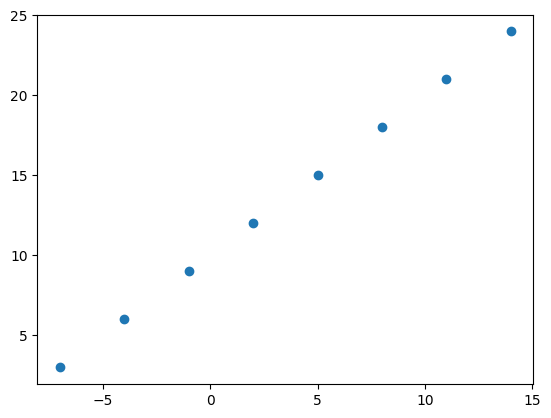

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, Y)

In [3]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

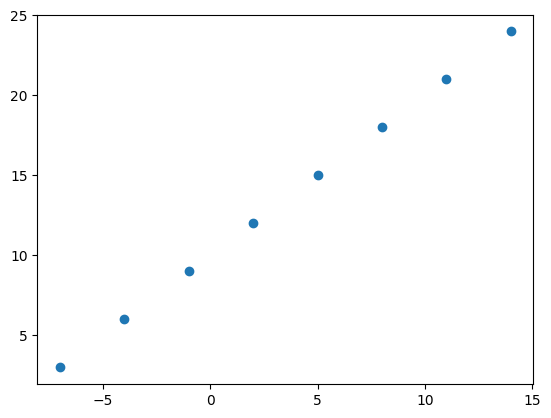

In [5]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

Y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, Y)

In [6]:
input_shape = X[0].shape

output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

**Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"]
)

# Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 328ms/step - loss: 10.6751 - mae: 10.6751
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 10.5426 - mae: 10.5426
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 10.4101 - mae: 10.4101
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 10.2776 - mae: 10.2776
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.1451 - mae: 10.1451


In [8]:
model.predict([17.0])

1/1 [==============================] - 0s 94ms/step


array([[16.74596]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or no more data (give the model more examples to learn from).


In [9]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 383ms/step - loss: 13.6524 - mae: 13.6524
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 13.1254 - mae: 13.1254
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 12.6160 - mae: 12.6160
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 12.1046 - mae: 12.1046
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 11.5879 - mae: 11.5879
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 11.0617 - mae: 11.0617
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 10.5280 - mae: 10.5280
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 10.0216 - mae: 10.0216
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 9.4962 - mae: 9.4962
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 8.9385 - mae: 8.9385


In [10]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 65ms/step


array([[15.087794]], dtype=float32)

In [12]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    # optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 520ms/step - loss: 12.4795 - mae: 12.4795
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7650 - mae: 11.7650
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0442 - mae: 11.0442
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3155 - mae: 10.3155
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5763 - mae: 9.5763
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.8231 - mae: 8.8231
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.0531 - mae: 8.0531
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2636 - mae: 7.2636
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8545 - mae: 6.8545
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.1120 - mae: 7.1120
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 49ms/step


array([[26.786226]], dtype=float32)

### **The learning rate is very important**

### **Evaluating a model**
> Visualize

It's a good idea to visualize:


*   The  data - what data are we workign
  with?
*   The model itself - what does our model look like?
*   The training of a model - how does a model perform while it learns?
*   The predictions of the model - how do the predictios of a model line up against what is should be

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Make labesl for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

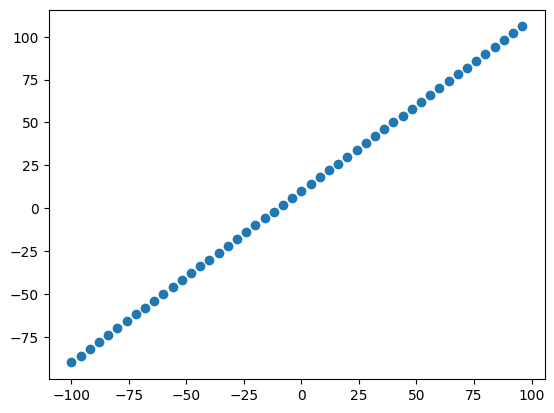

In [16]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, Y)

### The 3 sets...
*   Trainnig set 70-80%
*   Validatio set (10-15%) - the model gets tuned on this data
*   Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% ot total data.

In [17]:
# Check the length of how many samples we have
len(X)

50

In [18]:
# Split the data into train and test sets
X_train = X[:40] # first 40 (80%)
Y_train = Y[:40]

Y_test = Y[40:]
X_test = X[40:] # first 40 (20%)

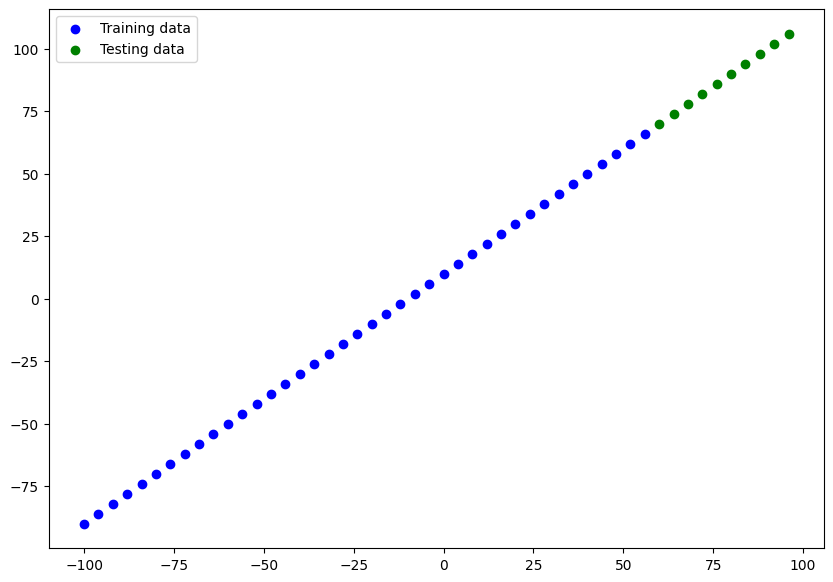

In [19]:
plt.figure(figsize=(10, 7))

# plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")

# plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# Show  a legend
plt.legend()


In [20]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.2626 - mae: 15.2626
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 13.4067 - mae: 13.4067
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1672 - mae: 12.1672
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.3835 - mae: 9.3835
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2657 - mae: 10.2657
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5160 - mae: 9.5160
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6415 - mae: 8.6415
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0466 - mae: 9.0466
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.9367 - mae: 18.9367
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2145 - mae: 10.2145
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

In [21]:
# Visualize the model
model.summary()
# video: 05:38

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Create a model
model = tf.keras.Sequential([
    # (let's try and play with the dense units)
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name="output_layer")

], name="model-1")

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=200, verbose=0)

In [23]:
#5:50

In [24]:
model.summary()

Model: "model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


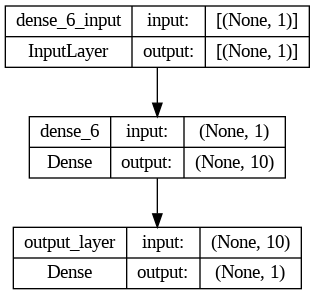

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model predictions

To visualize predictiosn, it's a good idea to plot them against the gorund truth labels.

Often you'ill see this in the form of y_test or y_true versus y_pred (ground truth versus  your model's predicitons)


In [26]:
# Make somoe predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[ 70.2073  ],
       [ 74.230194],
       [ 78.25308 ],
       [ 82.27597 ],
       [ 86.29886 ],
       [ 90.32176 ],
       [ 94.34465 ],
       [ 98.36755 ],
       [102.39044 ],
       [106.413315]], dtype=float32)

In [27]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [28]:
# Let's create a plotting function
def plot_predictions(
                     train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=y_pred
                     ):
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

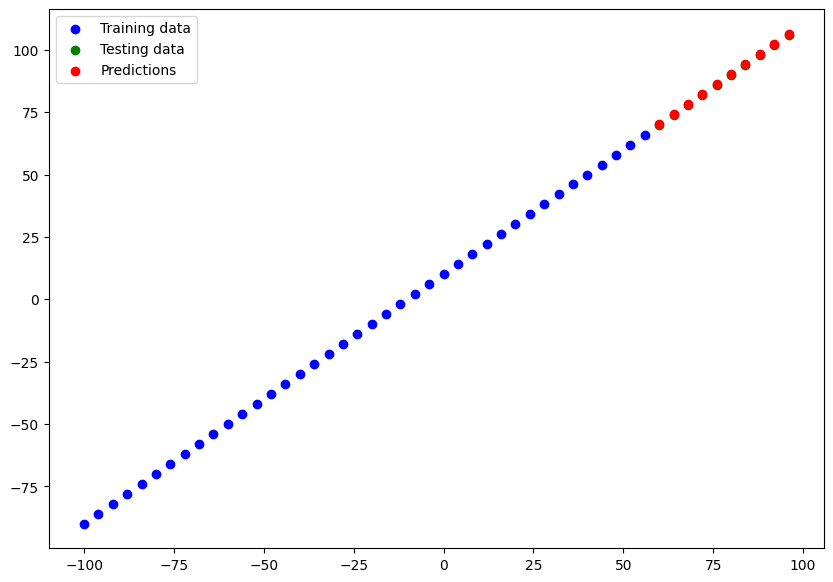

In [29]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - MEAN ABSOLUTE ERROR, "on average, how wrong is each of my model's predictions"
* MSE - mean square root: square the average error

In [30]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 140ms/step - loss: 0.3103 - mae: 0.3103


[0.31031036376953125, 0.31031036376953125]

In [31]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_pred=tf.constant(y_pred), y_true=Y_test)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.834162 , 14.661883 , 12.298767 , 10.744806 , 10.       ,
       10.064352 , 10.9378605, 12.620532 , 15.112353 , 18.413315 ],
      dtype=float32)>

In [32]:
# they don't have the same shape
tf.constant(y_pred), Y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.2073  ],
        [ 74.230194],
        [ 78.25308 ],
        [ 82.27597 ],
        [ 86.29886 ],
        [ 90.32176 ],
        [ 94.34465 ],
        [ 98.36755 ],
        [102.39044 ],
        [106.413315]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [33]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.2073  ,  74.230194,  78.25308 ,  82.27597 ,  86.29886 ,
        90.32176 ,  94.34465 ,  98.36755 , 102.39044 , 106.413315],
      dtype=float32)>

In [34]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true=Y_test,
    y_pred=tf.squeeze(y_pred) # we have to squeeze the y_pred to remove the last dim
  )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.31031266>

In [35]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(
      y_true=Y_test,
      y_pred=tf.squeeze(y_pred)
    )
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.10061731>

In [36]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
~~~
Build a mdoel -> fit it -> evaluate it -> teak it -> fit it -> evaluate it -> tweak it ...


1. Get more data
2. Make you rmodel larger (more layers, more hidden units for each layer)
3. Train for longer give your model more of a chance to find patterens in the data

In [37]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the mdoel
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 18.0682 - mae: 18.0682
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1912 - mae: 13.1912
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8588 - mae: 11.8588
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2407 - mae: 9.2407
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1001 - mae: 10.1001
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.3711 - mae: 9.3711
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5211 - mae: 8.5211
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0414 - mae: 9.0414
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 18.6255 - mae: 18.6255
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.0451 - mae: 10.0451
Epoch 11/100
2/2 [==============================] - 0s 10ms/step

1/1 [==============================] - 0s 74ms/step


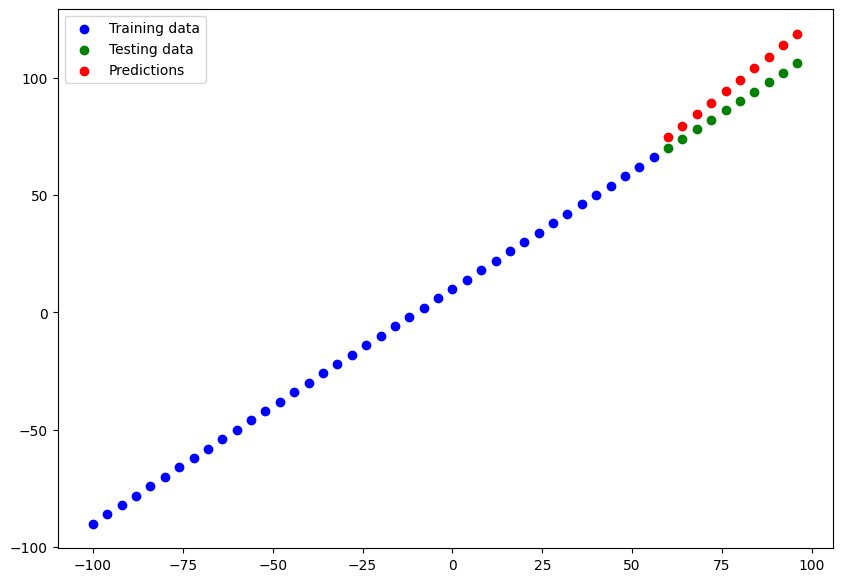

In [38]:
# Make and plot predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [39]:
mae_1 = mae(Y_test, y_preds_1)
mse_1 = mse(Y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.627986>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.95571>)

In [40]:
# 6:39

### Build `model_2`

In [41]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)



# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 17.0333 - mae: 17.0333
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 12.2372 - mae: 12.2372
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.5273 - mae: 11.5273
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4265 - mae: 9.4265
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.3144 - mae: 10.3144
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5595 - mae: 9.5595
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6784 - mae: 8.6784
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0539 - mae: 9.0539
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.0211 - mae: 19.0211
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2645 - mae: 10.2645
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - 

1/1 [==============================] - 0s 110ms/step


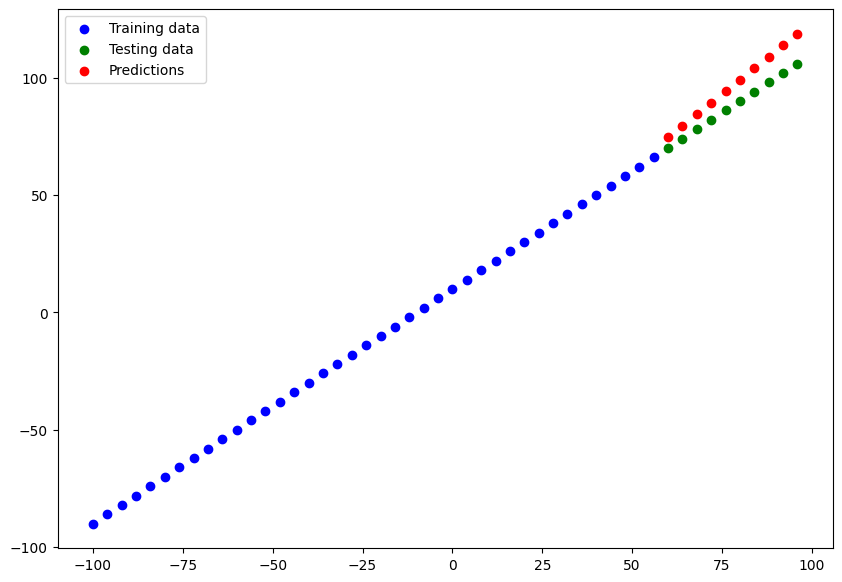

In [42]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [43]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test,  y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=8.656291>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.47094>)

In [48]:
### build `model_3`

# seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)



Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 41.2639 - mae: 41.2639
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 25.1908 - mae: 25.1908
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 31.3836 - mae: 31.3836
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 23.0615 - mae: 23.0615
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 13.7907 - mae: 13.7907
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0659 - mae: 11.0659
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 12.0553 - mae: 12.0553
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 10.8494 - mae: 10.8494
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 37.4946 - mae: 37.4946
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 25.1614 - mae: 25.1614
Epoch 11/500
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 164ms/step


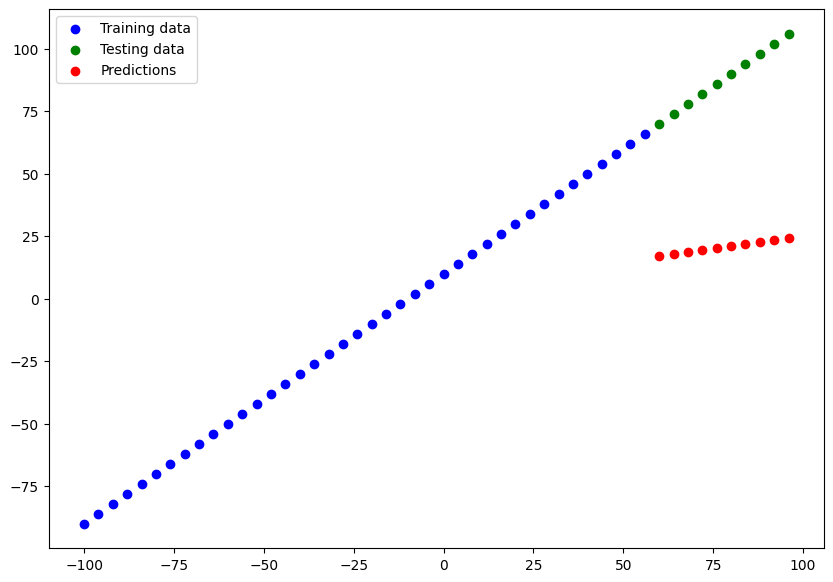

In [49]:
# plot perdictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [50]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, y_preds_3)
mse_3 = mse(Y_test, y_preds_3)
# 6:50